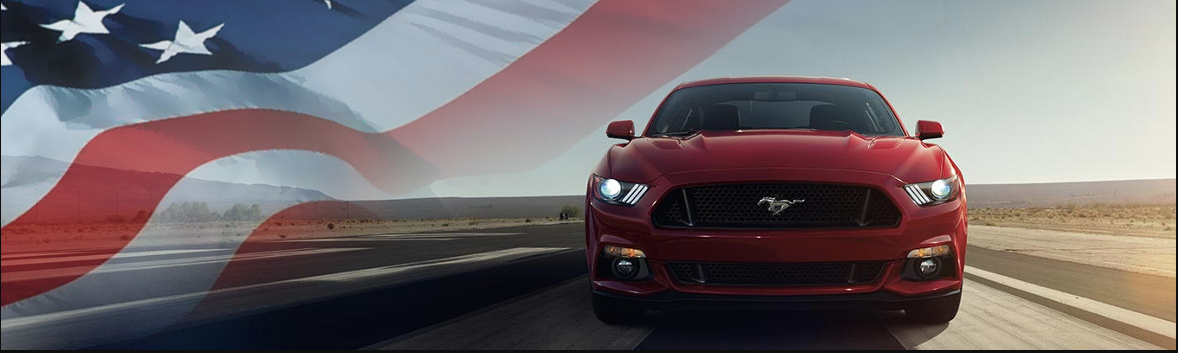

# Used Car Price Prediction in USA

Craigslist is the world's largest collection of used vehicles for sale, yet it's very difficult to collect all of them in the same place. This data create by scraping for a school project and expanded upon it later to create this dataset which includes every used vehicle entry within the United States on Craigslist.

This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 16 other categories. For previous listings, check older versions of the dataset.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('clean.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# 3. Exploratory Data Analysis (EDA)

### Check Price Distribution

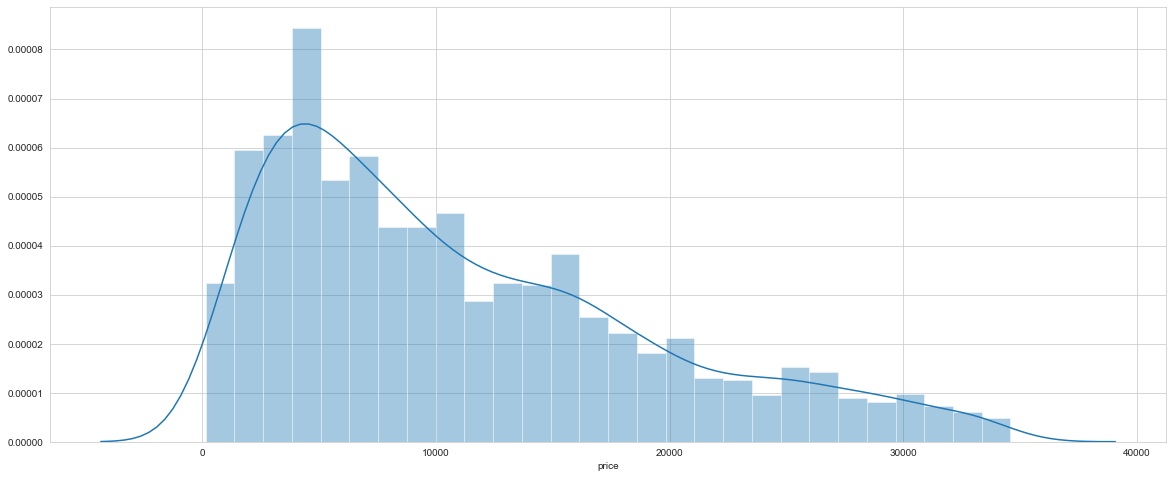

In [3]:
plt.figure(figsize=(20,8))
sns.distplot(df['price'])

- Price Distribution by Car's condition

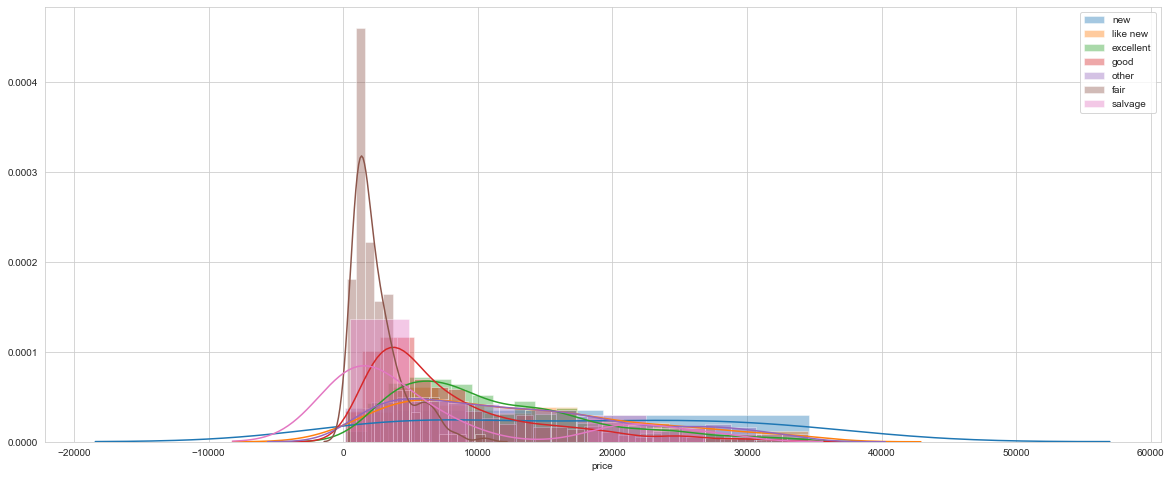

In [4]:
plt.figure(figsize=(20,8))
sns.distplot(df[df['condition'] == 'new']['price'], label='new')
sns.distplot(df[df['condition'] == 'like new']['price'], label='like new')
sns.distplot(df[df['condition'] == 'excellent']['price'], label='excellent')
sns.distplot(df[df['condition'] == 'good']['price'], label='good')
sns.distplot(df[df['condition'] == 'other']['price'], label='other')
sns.distplot(df[df['condition'] == 'fair']['price'], label='fair')
sns.distplot(df[df['condition'] == 'salvage']['price'], label='salvage')
plt.legend()

- Price Distribution by Car's fuel type

/Users/bayu/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/bayu/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/bayu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


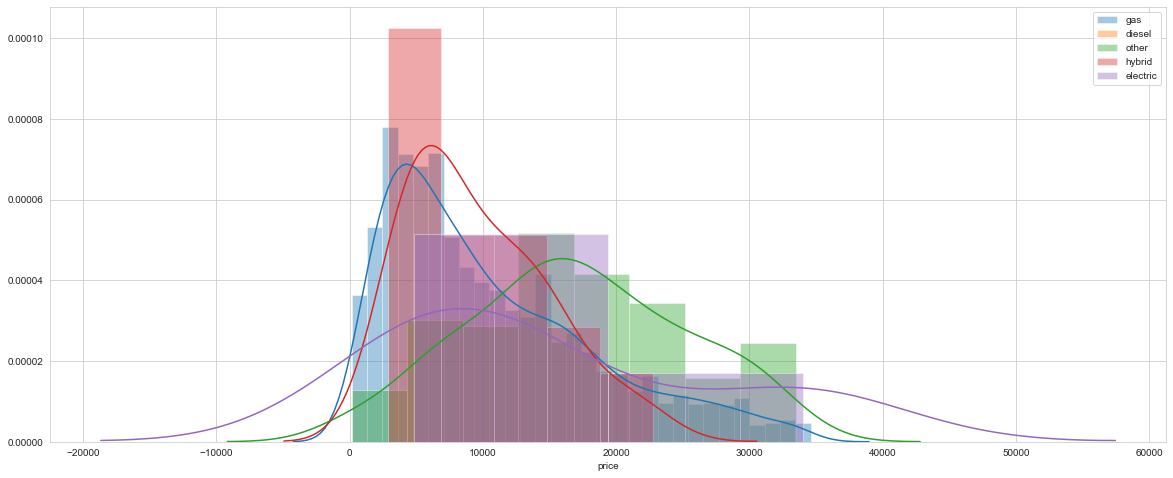

In [5]:
plt.figure(figsize=(20,8))
sns.distplot(df[df['fuel'] == 'gas']['price'], label='gas')
sns.distplot(df[df['fuel'] == 'diesel new']['price'], label='diesel')
sns.distplot(df[df['fuel'] == 'other']['price'], label='other')
sns.distplot(df[df['fuel'] == 'hybrid']['price'], label='hybrid')
sns.distplot(df[df['fuel'] == 'electric']['price'], label='electric')
plt.legend()

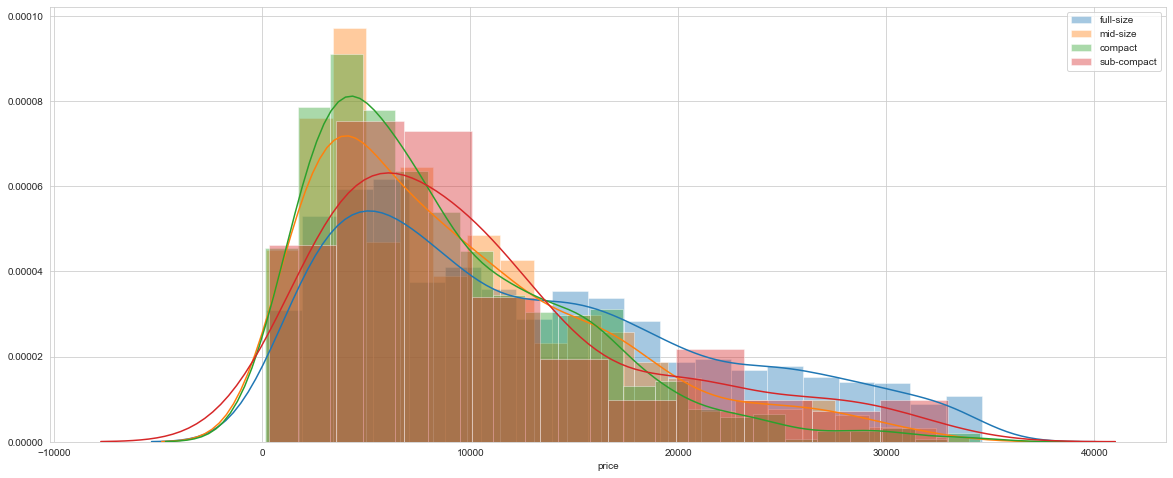

In [6]:
plt.figure(figsize=(20,8))
sns.distplot(df[df['size'] == 'full-size']['price'], label='full-size')
sns.distplot(df[df['size'] == 'mid-size']['price'], label='mid-size')
sns.distplot(df[df['size'] == 'compact']['price'], label='compact')
sns.distplot(df[df['size'] == 'sub-compact']['price'], label='sub-compact')
plt.legend()

- Price Distribution by Brand

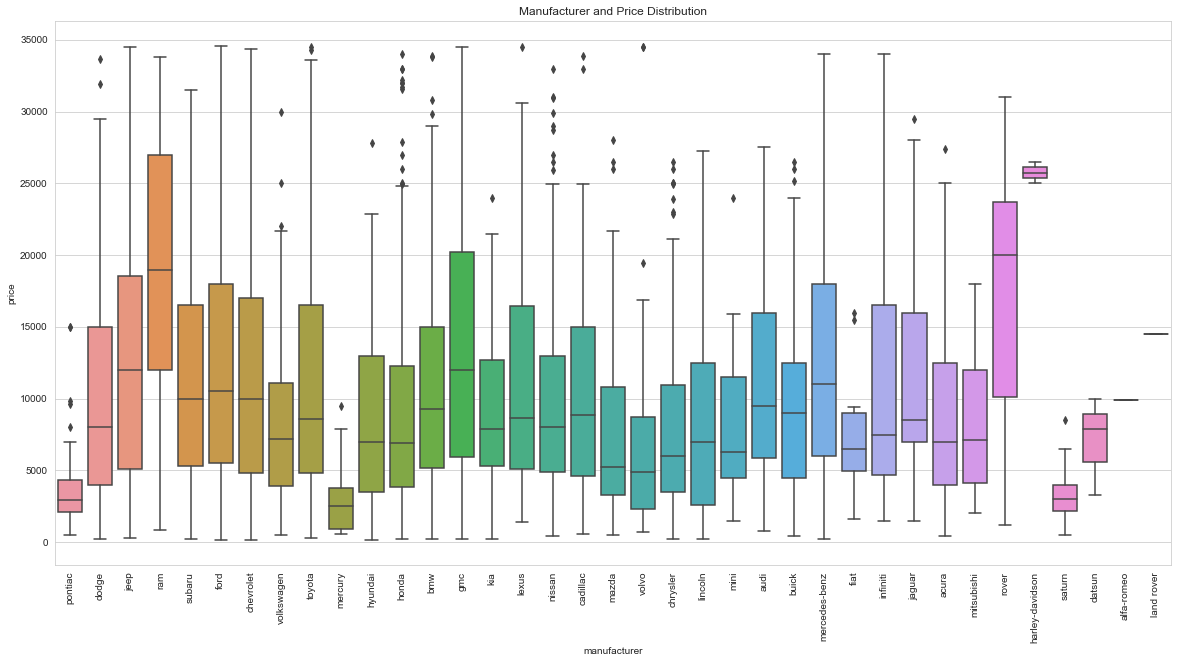

In [7]:
plt.figure(figsize=(20,10))
sns.boxplot(y="price",x ='manufacturer' ,data = df)
plt.title("Manufacturer and Price Distribution")
plt.xticks(rotation=90)
plt.show()

- Price distribution by year

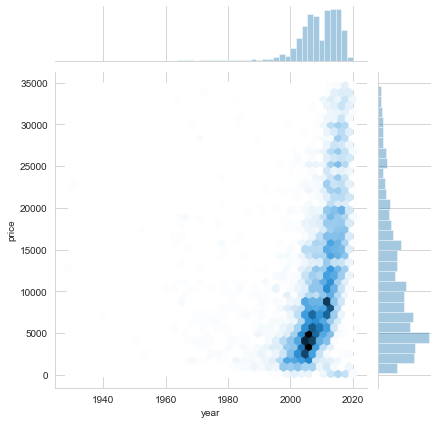

In [8]:
sns.jointplot(x='year', y='price', data=df, kind='hex')

- Price distribution by odometer

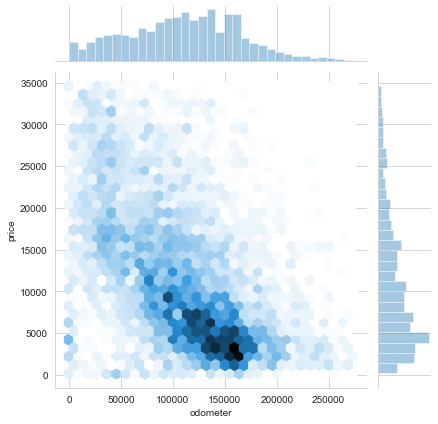

In [9]:
sns.jointplot(x='odometer', y='price', data=df, kind='hex')

- Correlation

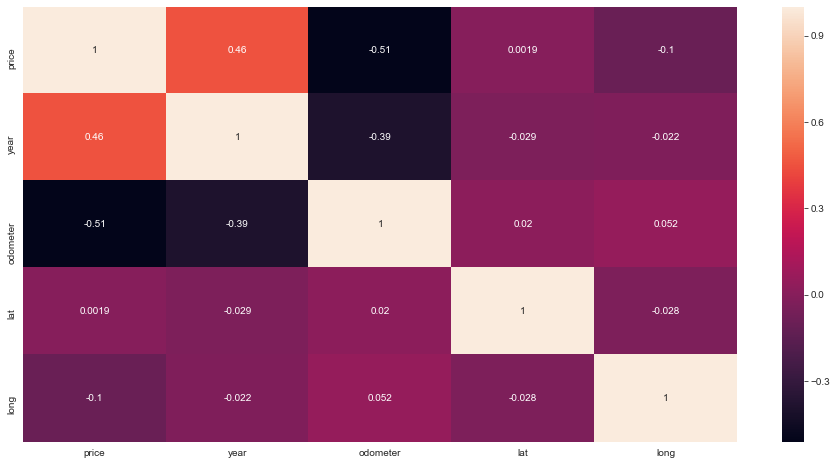

In [10]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

### Used Car Market share

- Market share by manufacturer

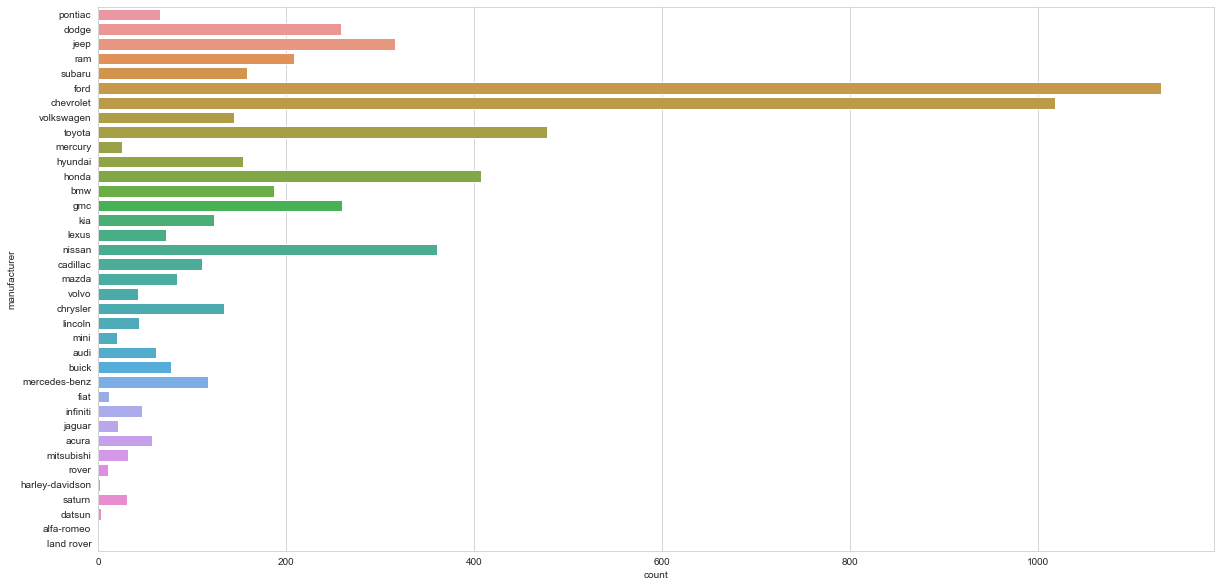

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(y=df['manufacturer'])

- Market share by type of the car

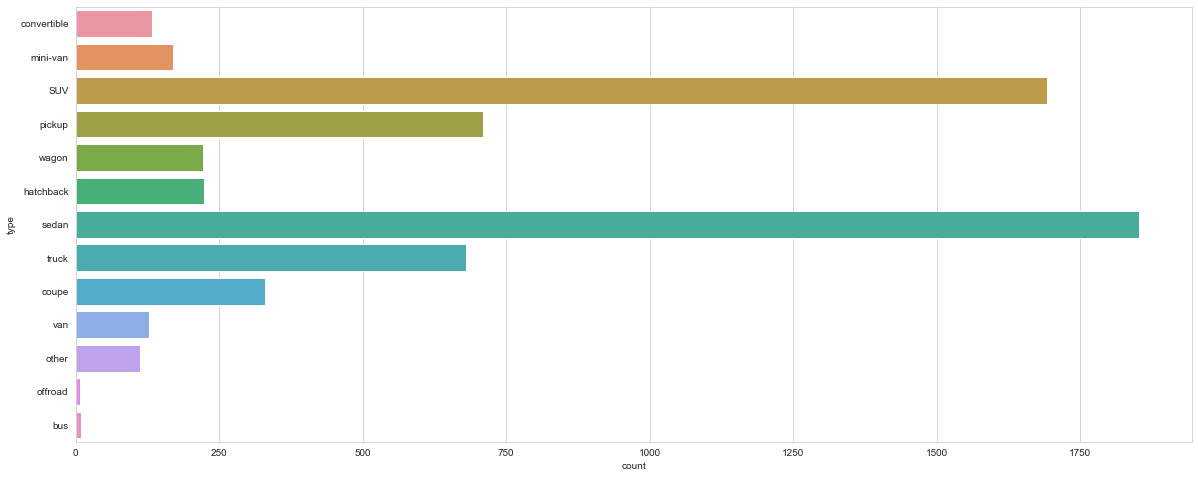

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(y=df['type'])

- Market share by paint color

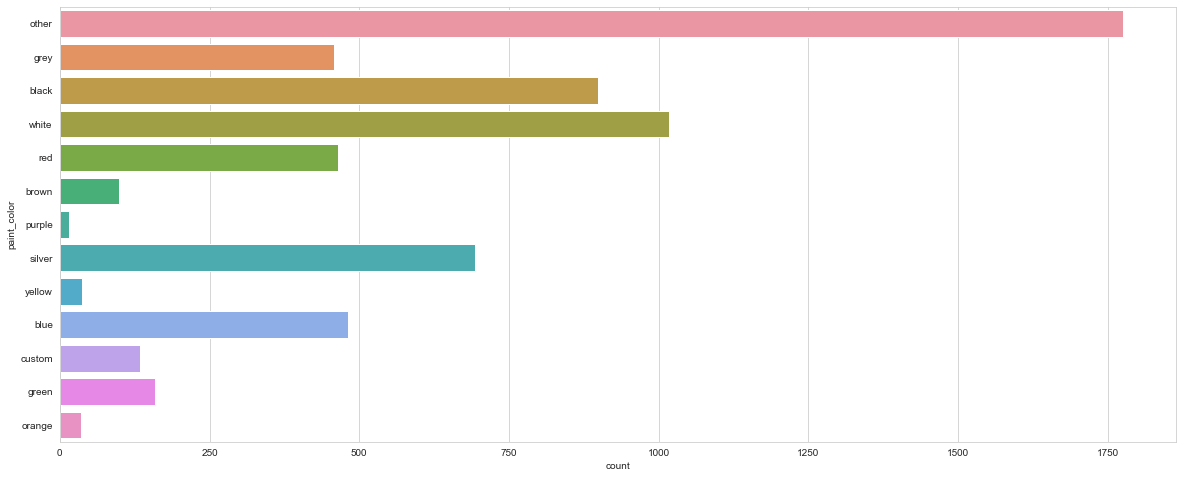

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(y=df['paint_color'])

- Market share by drive

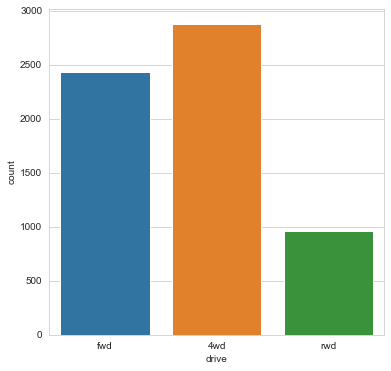

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['drive'])

- Market share by country manufacturer

In [15]:
def apply_country_manufacturer(x):
    if any(s in x for s in ("dodge", "ford", "gmc", "jeep", "chevrolet", "ram", "chrysler", 
                            "cadillac", "saturn", "lincoln", "buick",
                            "mercury","pontiac", "harley-davidson")):
        return 'America' 
    elif any(s in x for s in ('subaru', 'toyota', 'hyundai', 'honda', 'kia', 'lexus',
       'nissan', 'mazda', 'acura', 'mitsubishi', 'acura','datsun')):
        return 'Asia'
    else:
        return 'Europe'

In [16]:
df['country_manufacturer'] = df['manufacturer'].apply(apply_country_manufacturer)

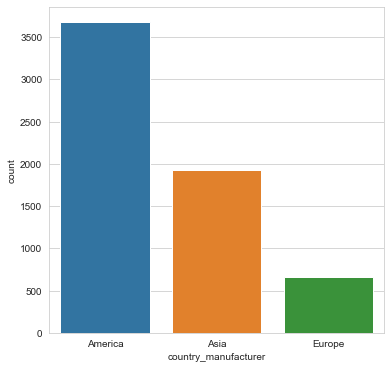

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['country_manufacturer'])

### Location of Seller

In [18]:
import folium
from folium.plugins import HeatMap

In [19]:
list_lat_long = []
for index,value in df.iterrows():
    temp = [value['lat'], value['long']]
    list_lat_long.append(temp)

In [20]:
map_craiglist = folium.Map( location =[42.357791,-71.139371], zoom_start = 5,
    tiles='OpenStreetMap') 
    
HeatMap(data=list_lat_long, radius=13).add_to(map_craiglist)
map_craiglist

### Check Description Column

In [21]:
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

Clean Description Text

In [22]:
def clean_text(x):
    letter_only = re.sub("[^a-zA-Z]", " ", x)
    return ' '.join(letter_only.split()).lower()

In [23]:
df['clean_desc'] = df['desc'].apply(clean_text)

In [24]:
def show_wordCloud(text):
    wc = WordCloud(background_color='black', max_font_size=50, max_words=300)
    my_wc = wc.generate(text)
    plt.figure(figsize=(30,6))
    plt.imshow(my_wc,interpolation='bilinear')
    plt.axis('off')
    plt.show()

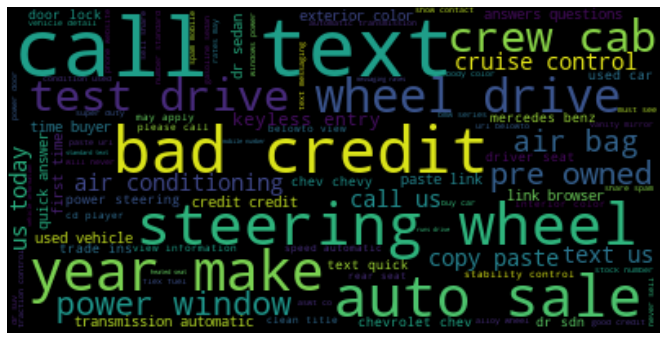

In [25]:
show_wordCloud((' '.join(list(df['clean_desc']))))

In [26]:
def show_most_words_appear(data):
    all_words =' '.join(list(data))
    list_all_words = all_words.split()
    word_count = Counter(list_all_words)
    word_count_series = pd.Series(word_count)
    
    word_wo_stopwords = []
    for item in word_count_series.index:
        if (item not in stopwords.words('english')):
            word_wo_stopwords.append(item)
            
    word_count_series = word_count_series.loc[word_wo_stopwords]
    most_words_appear = word_count_series.sort_values(ascending=False).head(20)
    
    plt.figure(figsize=(15,5))
    sns.barplot(most_words_appear.index, most_words_appear.values)

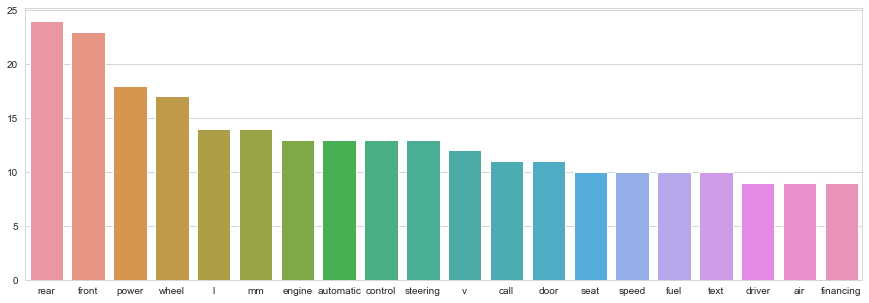

In [27]:
# Most word appear in condition new
show_most_words_appear(df[df['condition'] == 'new']['clean_desc'])

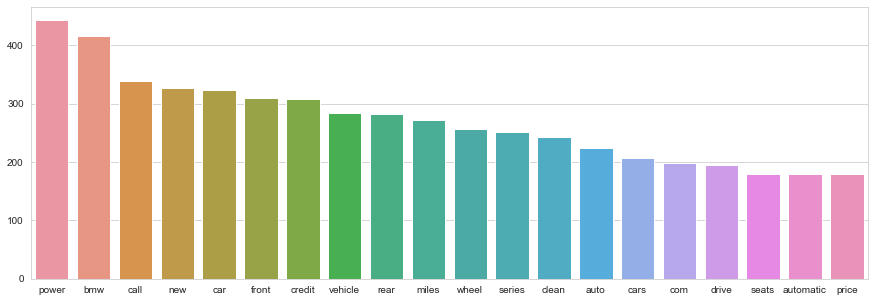

In [28]:
# Most word appear in condition like new
show_most_words_appear(df[df['condition'] == 'like new']['clean_desc'])

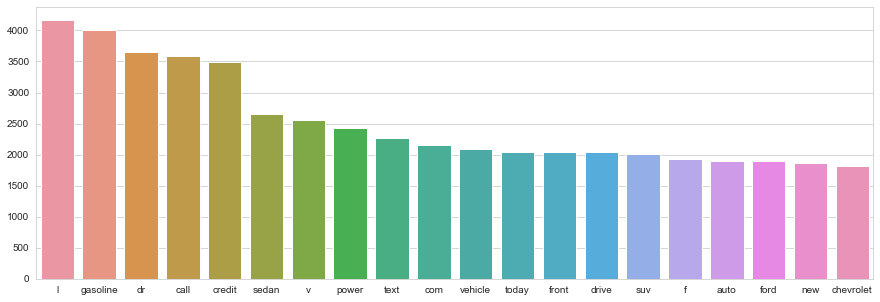

In [29]:
# Most word appear in condition excellent
show_most_words_appear(df[df['condition'] == 'excellent']['clean_desc'])

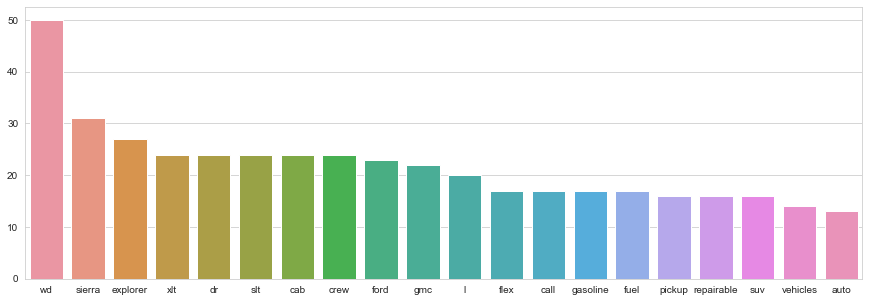

In [30]:
# Most word appear in condition salvage
show_most_words_appear(df[df['condition'] == 'salvage']['clean_desc'])